<a href="https://colab.research.google.com/github/Mina0402/EU_M_Math-Repository/blob/main/Chap07_Cm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set()
%matplotlib inline

%precision 3

'%.3f'

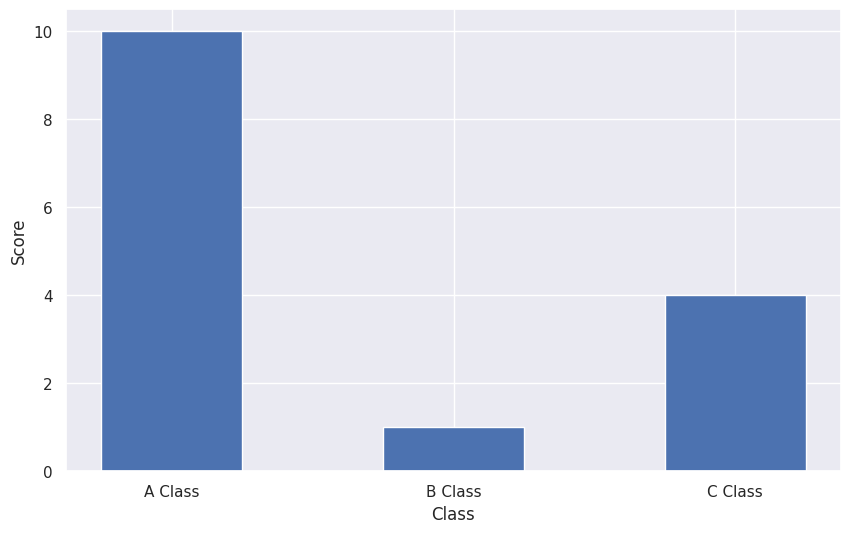

In [119]:
#棒グラフ
x=[1,2,3]
y=[10,1,4]

plt.figure(figsize=(10,6))

plt.bar(x,y, align='center',width=0.5)

plt.xticks(x,['A Class','B Class','C Class'])

plt.xlabel('Class')
plt.ylabel('Score')

plt.grid(True)

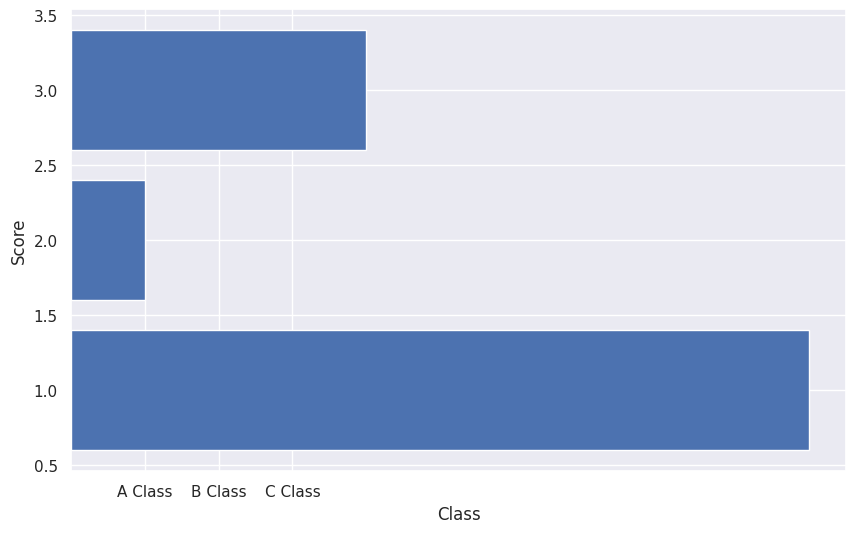

In [120]:
plt.figure(figsize=(10,6))

plt.barh(x,y, align='center')

plt.xticks(x,['A Class','B Class','C Class'])

plt.xlabel('Class')
plt.ylabel('Score')

plt.grid(True)

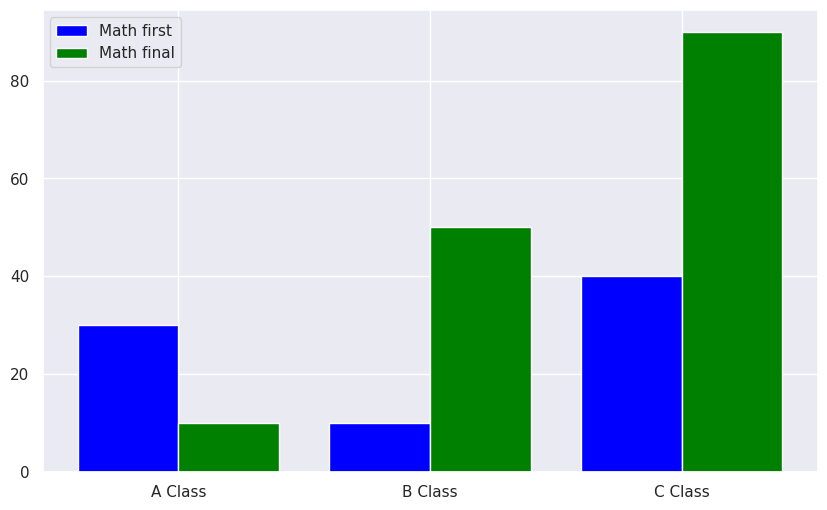

In [121]:
y1=np.array([30,10,40])
y2=np.array([10,50,90])

x=np.arange(len(y1))

w=0.4

plt.figure(figsize=(10,6))

plt.bar(x,y1,color='blue',width=w,label='Math first',align='center')
plt.bar(x+w,y2,color='green', width=w, label='Math final',align='center')

plt.legend(loc='best')

plt.xticks(x+w/2,['A Class','B Class','C Class'])

plt.grid(True)


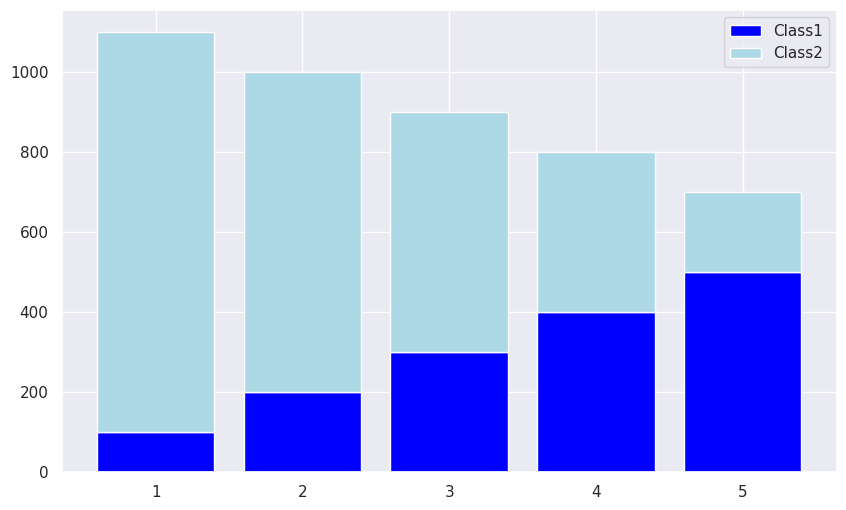

In [122]:
height1=np.array([100,200,300,400,500])
height2=np.array([1000,800,600,400,200])

x=np.array([1,2,3,4,5])

plt.figure(figsize=(10,6))

p1=plt.bar(x,height1,color='blue')
p2=plt.bar(x,height2,bottom=height1,color='lightblue')

plt.legend((p1[0],p2[0]),('Class1','Class2'))


(-1.1998593997207165,
 1.1047438740833693,
 -1.0999843660947275,
 1.0999992555283205)

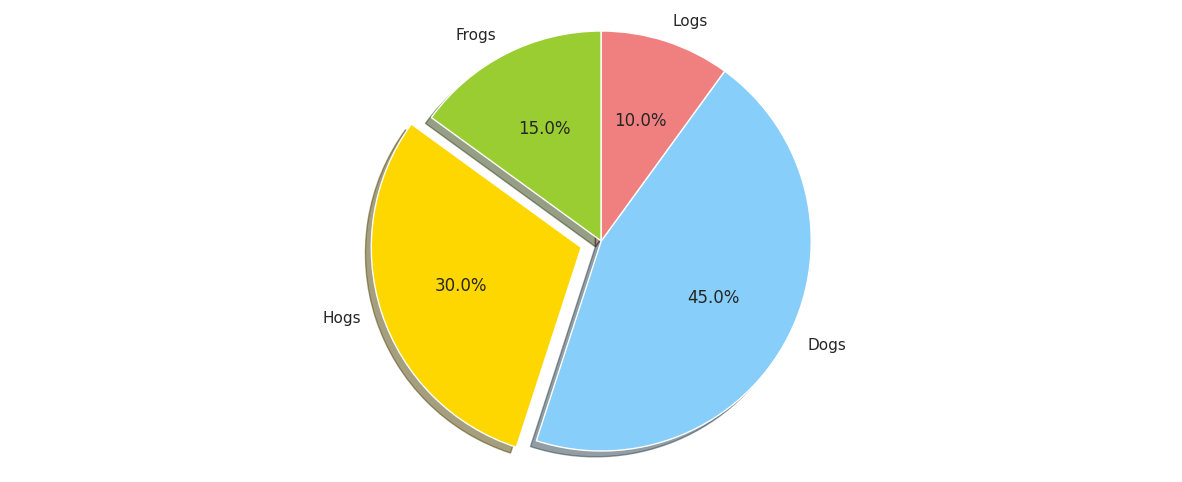

In [123]:
#円グラフ
labels=['Frogs','Hogs','Dogs','Logs']
sizes=[15,30,45,10]
colors=['yellowgreen','gold','lightskyblue','lightcoral']
explode=(0,0.1,0,0)

plt.figure(figsize=(15,6))

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)

plt.axis('equal')

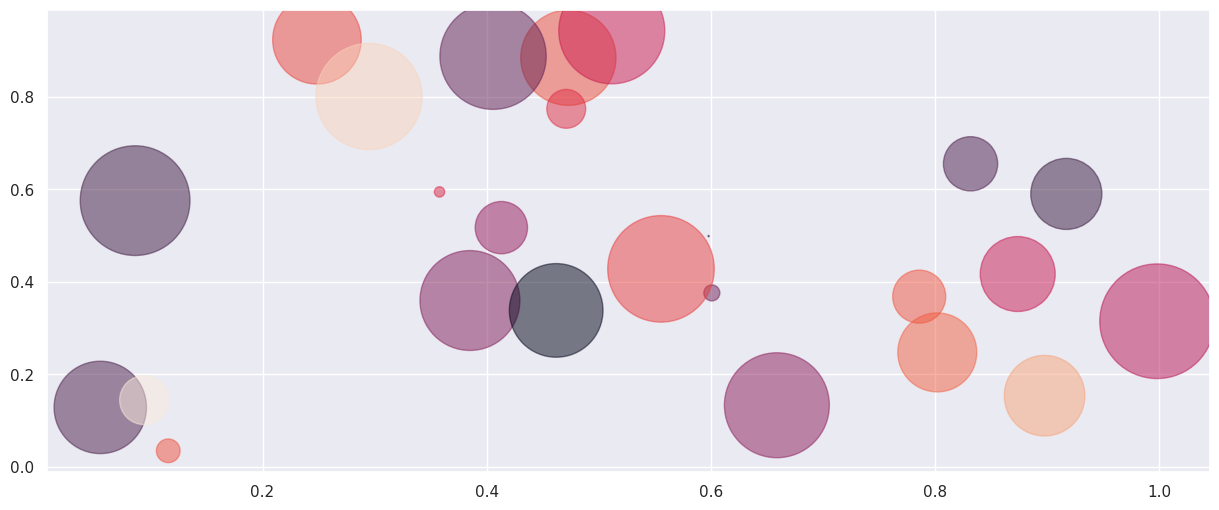

In [124]:
N=25

x=np.random.rand(N)
y=np.random.rand(N)

colors=np.random.rand(N)

area=10*np.pi*(15*np.random.rand(N))**2

plt.figure(figsize=(15,6))

plt.scatter(x,y,s=area,c=colors,alpha=0.5)

plt.grid(True)

In [125]:
#練習問題7-1
from sklearn import linear_model

import requests, zipfile
import io
from io import StringIO


url='https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r=requests.get(url, stream=True)

z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [126]:
data_math=pd.read_csv('student-mat.csv',sep=';')
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [127]:
data_math['reason'].value_counts()

reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

(-1.0999975538601565,
 1.0999992958372466,
 -1.2049468518167303,
 1.10499746913413)

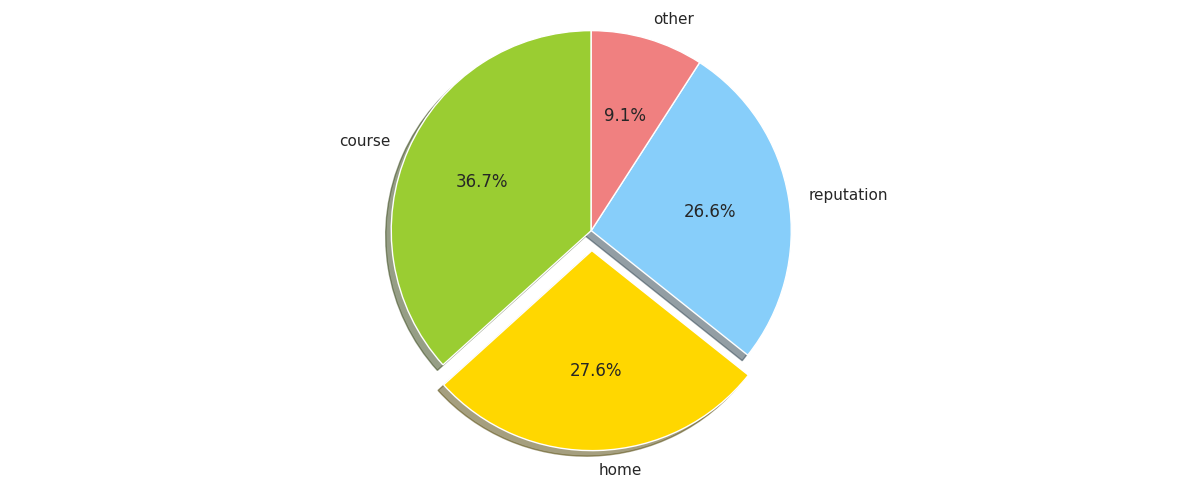

In [128]:
sum=145+109+105+36
labels=['course','home','reputation','other']
sizes=[(145/sum)*100,(109/sum)*100,(105/sum)*100,(36/sum)*100]
colors=['yellowgreen','gold','lightskyblue','lightcoral']
explode=(0,0.1,0,0)

plt.figure(figsize=(15,6))

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)

plt.axis('equal')

In [129]:
#練習問題7-2
data_math['higher'].value_counts()

higher
yes    375
no      20
Name: count, dtype: int64

In [130]:
data_math_higher_G3=data_math.groupby(['higher'],as_index=False)['G3'].mean()
data_math_higher_G3


,higher,G3
0,no,6.800
1,yes,10.608


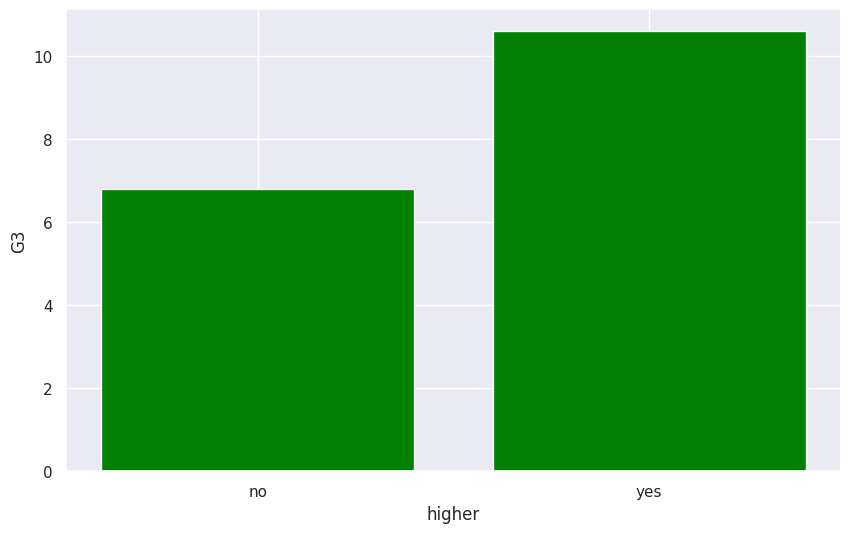

In [131]:
plt.figure(figsize=(10, 6))
plt.bar(data_math_higher_G3['higher'], data_math_higher_G3['G3'], color='green')
plt.xlabel('higher')
plt.ylabel('G3')
plt.show()

In [132]:
print('yesと答えた方が数学のG3の成績が良い')

yesと答えた方が数学のG3の成績が良い


In [133]:
#練習問題7-3
data_math['traveltime'].value_counts()

traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64

In [134]:
data_math_traveltime=data_math.groupby(['traveltime'],as_index=False)['G3'].mean()
data_math_traveltime

,traveltime,G3
0,1,10.782101
1,2,9.906542
2,3,9.260870
3,4,8.750000


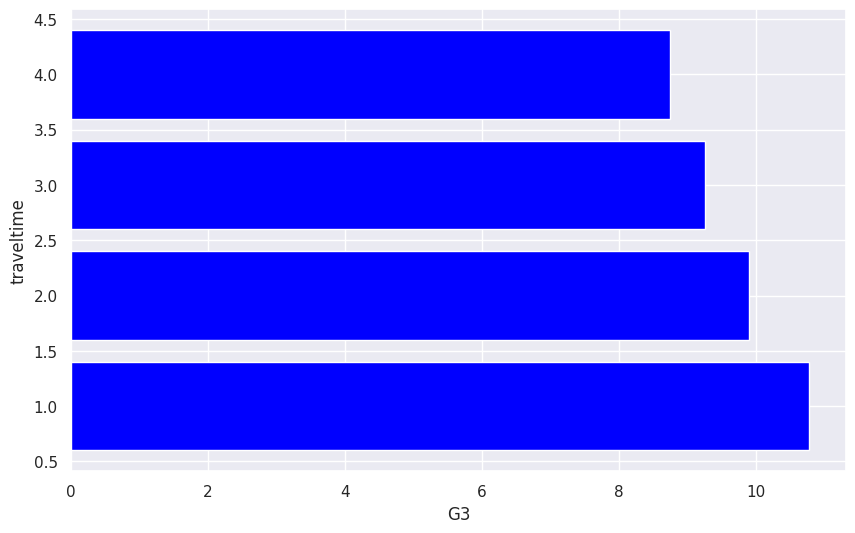

In [135]:
plt.figure(figsize=(10,6))

plt.barh(data_math_traveltime['traveltime'], data_math_traveltime['G3'], color='blue', align='center')

plt.xlabel('G3')
plt.ylabel('traveltime')

plt.grid(True)

In [136]:
print('通勤時間が長いほうが、数学のG3の成績が悪くなる')

通勤時間が長いほうが、数学のG3の成績が悪くなる


In [137]:
#金融データの可視化
idx=pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

dn=np.random.randint(2, size=len(idx))*2-1

rnd_walk=np.cumprod(np.exp(dn*0.0002))*100

df=pd.Series(rnd_walk, index=idx).resample('B').ohlc()


<Axes: >

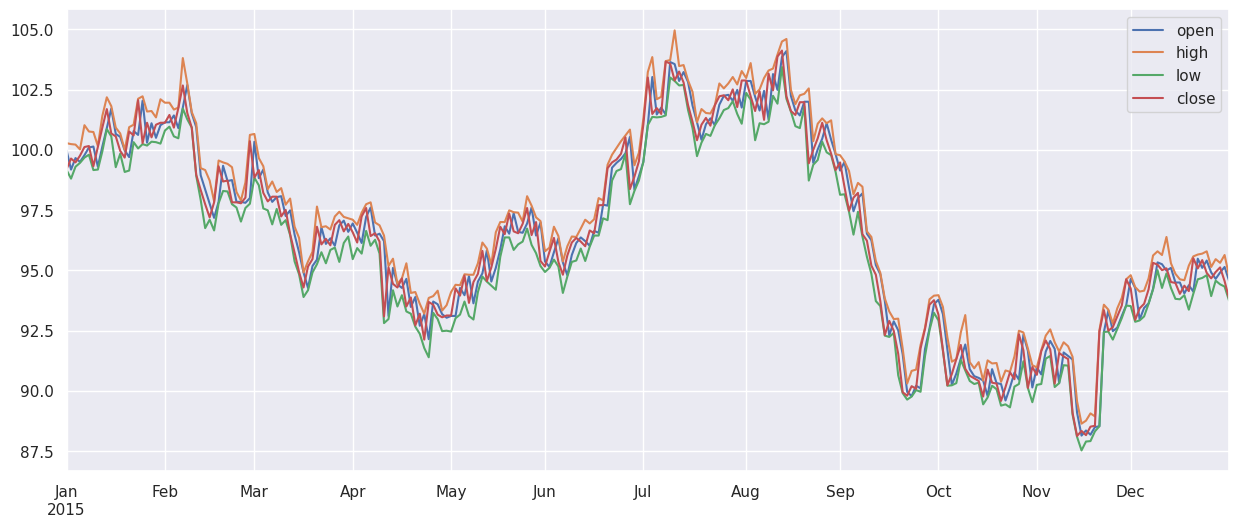

In [138]:
df.plot(figsize=(15,6), legend='best', grid=True)

In [139]:
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF

init_notebook_mode(connected=True)

fig=FF.create_candlestick(df.open, df.high, df.low, df.close, dates=df.index)

fig.show(renderer="colab")

In [140]:
#総合問題7-1
#1.
import requests, zipfile
import io
from io import StringIO

zip_file_url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'

r=requests.get(zip_file_url, stream=True)

z=zipfile.ZipFile(io.BytesIO(r.content))

In [141]:
z.extractall()

In [142]:
dow_jones_index=pd.read_csv('dow_jones_index.data',sep=',')
dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [143]:
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [144]:
#2.
dow_jones_index.date=pd.to_datetime(dow_jones_index.date)
def delete_dolchar(x):
    return x.replace('$', '') if isinstance(x, str) else x


In [145]:
dow_jones_index.open=pd.to_numeric(dow_jones_index.open.map(delete_dolchar))
dow_jones_index.high=pd.to_numeric(dow_jones_index.high.map(delete_dolchar))
dow_jones_index.low=pd.to_numeric(dow_jones_index.low.map(delete_dolchar))
dow_jones_index.close=pd.to_numeric(dow_jones_index.close.map(delete_dolchar))
dow_jones_index.next_weeks_open=pd.to_numeric(dow_jones_index.next_weeks_open.map(delete_dolchar))
dow_jones_index.next_weeks_close=pd.to_numeric(dow_jones_index.next_weeks_close.map(delete_dolchar))


In [146]:
dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [147]:
type(dow_jones_index)

pandas.core.frame.DataFrame

In [148]:
dow_jones_index_stock_index = dow_jones_index.set_index(['date', 'stock'])

dow_jones_index_stock_index_unstack = dow_jones_index_stock_index.unstack()

dow_close_data = dow_jones_index_stock_index_unstack['close']

print(dow_close_data.describe())

stock         AA        AXP         BA        BAC         CAT       CSCO  \
count  25.000000  25.000000  25.000000  25.000000   25.000000  25.000000   
mean   16.504400  46.712400  73.448000  13.051600  103.152000  17.899200   
std     0.772922   2.396248   3.087631   1.417382    6.218651   1.984095   
min    14.720000  43.530000  69.100000  10.520000   92.750000  14.930000   
25%    16.030000  44.360000  71.640000  11.930000   99.590000  16.880000   
50%    16.520000  46.250000  72.690000  13.370000  103.540000  17.520000   
75%    17.100000  48.500000  74.840000  14.250000  107.210000  18.700000   
max    17.920000  51.190000  79.780000  15.250000  115.410000  22.050000   

stock         CVX         DD        DIS         GE  ...        MRK       MSFT  \
count   25.000000  25.000000  25.000000  25.000000  ...  25.000000  25.000000   
mean   101.175600  52.873600  41.249600  19.784000  ...  34.360400  25.920800   
std      5.267066   2.367048   1.882473   0.912022  ...   1.666357   1.4

In [149]:
#4.
corr_data=dow_close_data.corr()
corr_data

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


<Axes: xlabel='stock', ylabel='stock'>

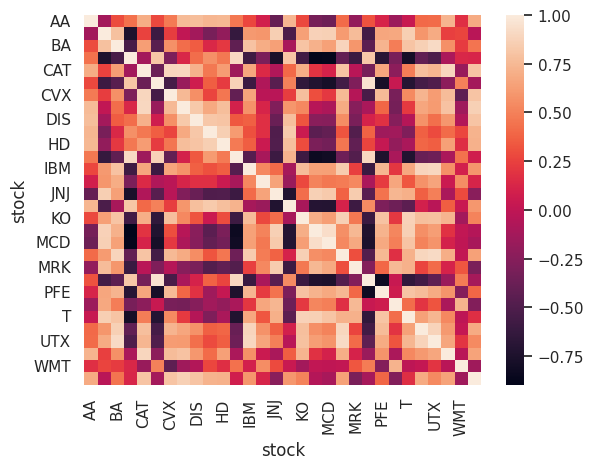

In [150]:
sns.heatmap(corr_data)

In [153]:
#5.
max_corr = 0
stock_1 = ''
stock_2 = ''

for i in range(0, len(corr_data)):
    print(
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
    )

    if max_corr < abs(corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]):
        max_corr = abs(corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0])
        stock_1 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1]
        stock_2 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0]

print('[Max Corr]:', max_corr)
print('[Stock 1]:', stock_1)
print('[Stock 2]:', stock_2)

AA DIS 0.7724697655620214
AXP KRFT 0.8735103611554017
BA UTX 0.9163379610743169
BAC HPQ 0.9058167680009366
CAT DD 0.9028558103078965
CSCO MSFT 0.9537216645891365
CVX CAT 0.8894156562923724
DD CAT 0.9028558103078965
DIS DD 0.8269258130241477
GE HD 0.8582069310150242
HD GE 0.8582069310150242
HPQ BAC 0.9058167680009366
IBM UTX 0.8975523835362522
INTC BA 0.6910939563692001
JNJ KRFT 0.8612879882611021
JPM GE 0.830450859436039
KO T 0.868995241583572
KRFT MCD 0.9299213037922904
MCD KRFT 0.9299213037922904
MMM UTX 0.9136955626526879
MRK JNJ 0.8440270438854454
MSFT CSCO 0.9537216645891365
PFE T 0.806543944675414
PG MRK 0.7497131367292437
T KO 0.868995241583572
TRV MMM 0.8917262016156643
UTX BA 0.9163379610743169
VZ CAT 0.8903147891825165
WMT PG 0.7237055485083286
XOM DD 0.8635107559399798
[Max Corr]: 0.9537216645891365
[Stock 1]: CSCO
[Stock 2]: MSFT


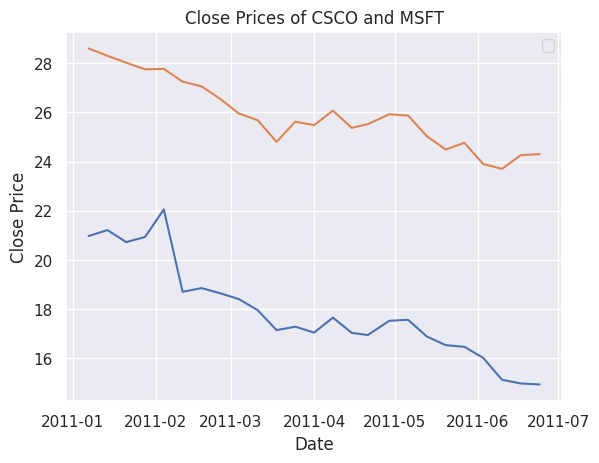

In [157]:
import matplotlib.pyplot as plt

plt.plot(dow_close_data_subsets)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of {} and {}'.format(stock_1, stock_2))
plt.legend()
plt.grid(True)
plt.show()

In [158]:
#6.
dow_close_data.rolling(center=False, window=5).mean().head(10)

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-04,16.290,44.858,70.348,14.328,95.152,21.176,93.656,50.146,39.608,19.550,...,34.288,28.088,18.498,64.750,28.214,55.236,80.462,35.656,55.470,78.936
2011-02-11,16.480,45.336,70.900,14.432,97.114,20.722,94.708,51.110,40.400,20.130,...,33.432,27.818,18.596,64.796,28.138,56.368,81.686,35.748,55.792,80.382
2011-02-18,16.742,45.192,71.494,14.332,99.484,20.250,95.886,52.346,41.254,20.654,...,33.156,27.570,18.766,64.550,28.166,57.626,82.872,35.980,55.906,81.714
2011-02-25,16.920,44.698,71.618,14.322,101.334,19.834,97.550,53.490,41.896,20.870,...,32.814,27.276,18.866,63.936,28.126,58.546,83.506,36.184,55.110,82.986
2011-03-04,17.010,44.670,72.132,14.426,102.806,19.328,99.626,54.206,42.836,20.904,...,32.812,26.916,19.168,63.502,28.212,59.220,83.792,36.274,54.184,84.204


In [159]:
#7.
log_ratio_stock_close=np.log(dow_close_data/dow_close_data.shift(1))

max_val_stock=log_ratio_stock_close.std().idxmax()
min_val_stock=log_ratio_stock_close.std().idxmin()

print('max volatility:', max_val_stock)
print('min volatility:', min_val_stock)


max volatility: CSCO
min volatility: KO


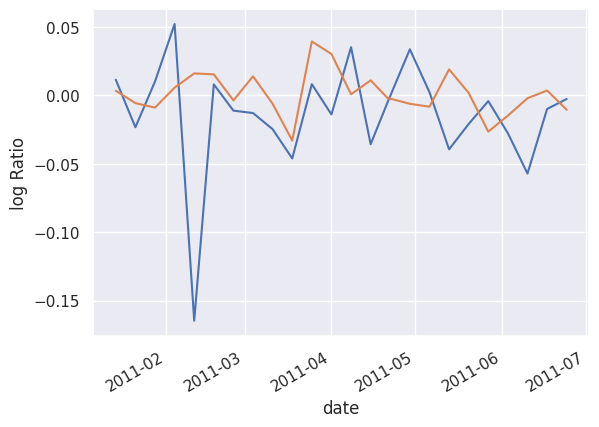

In [160]:
log_ratio_stock_close[max_val_stock].plot()
log_ratio_stock_close[min_val_stock].plot()
plt.ylabel('log Ratio')
plt.legend
plt.grid(True)